In [59]:
# Dependencies
import pandas as pd
import numpy as np
import warnings
from numpy import savetxt
warnings.simplefilter('ignore')

In [60]:
# Load csv files into dataframe
train = pd.read_csv("Resources/train.csv")
test = pd.read_csv("Resources/test.csv")

In [61]:
train.head()


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [62]:
# train['Cabin'] = train['Cabin'].str.replace('[^0-9]','')
# test['Cabin'] = test['Cabin'].str.replace('[^0-9]','')
# test

train['Cabin']=train.Cabin.replace('/','', regex=True)
train['Cabin']=train.Cabin.str.replace('\d+','')
print(train.Cabin.unique())
test['Cabin']=test.Cabin.replace('/','', regex=True)
test['Cabin']=test.Cabin.str.replace('\d+','')
print(test.Cabin.unique())

['BP' 'FS' 'AS' 'FP' 'GS' nan 'GP' 'ES' 'DP' 'CS' 'CP' 'DS' 'BS' 'AP' 'EP'
 'TP' 'TS']
['GS' 'FS' 'CS' 'FP' 'BP' 'DS' 'DP' 'EP' 'GP' 'BS' nan 'CP' 'AP' 'ES' 'AS'
 'TS' 'TP']


In [63]:
# Find the structure of data set
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [64]:
# Find aggregate values of dataset
train.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [65]:
# Find unique values of non-numeric columns
print(train.Destination.unique())
print(len(train.Cabin.unique()))
print(train.HomePlanet.unique())

['TRAPPIST-1e' 'PSO J318.5-22' '55 Cancri e' nan]
17
['Europa' 'Earth' 'Mars' nan]


In [66]:
# Find number of null values in the train data set
print(train.isna().sum())

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64


In [67]:
# Find number of null values in the test data set
test.isna().sum()


PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64

In [68]:
# Remove null values with 0, median value and 'False'
age_median = train.Age.median()
train.Age.fillna(age_median, inplace = True)
train.fillna(0, inplace = True)

In [69]:
test_age_median = test.Age.median()
test.Age.fillna(test_age_median, inplace = True)
test.fillna(0, inplace = True)

In [70]:
# Remove columns Name, PassengerID which is not relevent 
train_df = train.drop(columns = ['Name','PassengerId'])
test_df = test.drop(columns = ['Name','PassengerId'])
test_df.shape

(4277, 11)

In [71]:
# Fill boolean values with 1, 0 in train_df features
train_df.CryoSleep.replace({True:1,False:0}, inplace = True)
train_df.Transported.replace({True:1,False:0}, inplace = True)

train_df.VIP.replace({True:1,False:0}, inplace = True)
# Replace categorical destination values with 0 1 2 3
train_df.Destination.replace({'TRAPPIST-1e':0, 'PSO J318.5-22':1, 
                              '55 Cancri e':2}, inplace = True)
# Dropping features Destination as it has lesser dependency on target variable
train_df.drop(columns=['Spa'], inplace = True)

# Replace categorical Home planet values with 1 2 3
train_df.HomePlanet.replace({'Europa':1,'Earth':0,'Mars':2,
                             }, inplace = True)
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    8693 non-null   int64  
 1   CryoSleep     8693 non-null   int64  
 2   Cabin         8693 non-null   object 
 3   Destination   8693 non-null   int64  
 4   Age           8693 non-null   float64
 5   VIP           8693 non-null   int64  
 6   RoomService   8693 non-null   float64
 7   FoodCourt     8693 non-null   float64
 8   ShoppingMall  8693 non-null   float64
 9   VRDeck        8693 non-null   float64
 10  Transported   8693 non-null   int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 747.2+ KB


In [72]:
train_df.corr()[['Transported']]

,Transported
HomePlanet,0.115461
CryoSleep,0.460132
Destination,0.108152
Age,-0.074233
VIP,-0.037261
RoomService,-0.241124
FoodCourt,0.045583
ShoppingMall,0.009391
VRDeck,-0.204874
Transported,1.000000


In [73]:
# Fill boolean values with 1, 0 in train_df features
test_df.CryoSleep.replace({True:1,False:0}, inplace = True)
test_df.VIP.replace({True:1,False:0}, inplace = True)

# Replace categorical destination values with 0 1 2 3
test_df.Destination.replace({'TRAPPIST-1e':0, 'PSO J318.5-22':1, 
                              '55 Cancri e':2}, inplace = True)
# Dropping features Destination as it has lesser dependency on target variable
test_df.drop(columns=['Spa'], inplace = True)

# Replace categorical Home planet values with 1 2 3
test_df.HomePlanet.replace({'Europa':1,'Earth':0,'Mars':2,
                            }, inplace = True)


In [74]:
test_df = pd.get_dummies(test_df)
train_df=pd.get_dummies(train_df)

In [75]:
train_df.corr()[['Transported']]

,Transported
HomePlanet,0.115461
CryoSleep,0.460132
Destination,0.108152
Age,-0.074233
VIP,-0.037261
RoomService,-0.241124
FoodCourt,0.045583
ShoppingMall,0.009391
VRDeck,-0.204874
Transported,1.000000


In [76]:
# train_df.drop(columns=['Cabin_0','Cabin_AS','Cabin_TP','Cabin_TS'], inplace = True)

# test_df.drop(columns=['Cabin_0','Cabin_AS','Cabin_TP','Cabin_TS'], inplace = True)

In [77]:
print(train_df.shape)
print(test_df.shape)

(8693, 27)
(4277, 26)


In [78]:
# Seperate dependent variables and independent variable
y = train_df.loc[:, train_df.columns == 'Transported']
X = train_df.loc[:, train_df.columns !='Transported']
X


,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,VRDeck,Cabin_0,...,Cabin_DP,Cabin_DS,Cabin_EP,Cabin_ES,Cabin_FP,Cabin_FS,Cabin_GP,Cabin_GS,Cabin_TP,Cabin_TS
0,1,0,0,39.0,0,0.0,0.0,0.0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,24.0,0,109.0,9.0,25.0,44.0,0,...,0,0,0,0,0,1,0,0,0,0
2,1,0,0,58.0,1,43.0,3576.0,0.0,49.0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,33.0,0,0.0,1283.0,371.0,193.0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,16.0,0,303.0,70.0,151.0,2.0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,1,0,2,41.0,1,0.0,6819.0,0.0,74.0,0,...,0,0,0,0,0,0,0,0,0,0
8689,0,1,1,18.0,0,0.0,0.0,0.0,0.0,0,...,0,0,0,0,0,0,0,1,0,0
8690,0,0,0,26.0,0,0.0,0.0,1872.0,0.0,0,...,0,0,0,0,0,0,0,1,0,0
8691,1,0,2,32.0,0,0.0,1049.0,0.0,3235.0,0,...,0,0,0,1,0,0,0,0,0,0


In [79]:
# Split X and y using train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.70, random_state=70)

# Get shape of train test data
print("train size X : ",X_train.shape)
print("train size y : ",y_train.shape)
print("test size X : ",X_test.shape)
print("test size y : ",y_test.shape)
print("test_df : ", test_df.shape)

train size X :  (6085, 26)
train size y :  (6085, 1)
test size X :  (2608, 26)
test size y :  (2608, 1)
test_df :  (4277, 26)


In [80]:
# Check the distribution of labels
y_train.value_counts(normalize = True)

Transported
1              0.503862
0              0.496138
dtype: float64

## Applying Standard Scaler

In [81]:
from sklearn.preprocessing import StandardScaler
 
ss = StandardScaler()

# Fit and transform the data
X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.fit_transform(X_test)
test_df_scaled=ss.fit_transform(test_df)

## Applying Robest Scaler

In [82]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()

X_train_rs = scaler.fit_transform(X_train)
X_test_rs = scaler.fit_transform(X_test)
test_df_rs = scaler.fit_transform(test_df)

## Logistic Regression Model

In [83]:
# Scaled Logistic Regression Model
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(class_weight = 'balanced', solver='liblinear',
                       multi_class='auto',C=10, penalty='l1')
lr.fit(X_train, y_train)

# Model Accuracy
print(f"Training Data Score: {lr.score(X_train, y_train)}")
print(f"Testing Data Score: {lr.score(X_test, y_test)}")
y_pred = lr.predict(test_df)
print(y_pred)
spaceship_df = pd.DataFrame({'PassengerId':test.PassengerId, 'Transported':y_pred})
spaceship_df['Transported'] = spaceship_df.Transported.map({0:False, 1:True})
# save predicted data in csv file
# spaceship_df.to_csv('spaceship_lr.csv', index = False)

Training Data Score: 0.7651602300739524
Testing Data Score: 0.7714723926380368
[1 0 1 ... 1 0 1]


## Confusion Matrix

In [84]:
from sklearn.metrics import confusion_matrix

# Confusion matrix of logistic regression model
y_pred = lr.predict(X_test)
confusion = confusion_matrix(y_test, y_pred)
confusion

array([[1007,  289],
       [ 307, 1005]], dtype=int64)






































































































































































## Decision Tree Classifier

In [85]:
from sklearn.tree import DecisionTreeClassifier

# Train and fit the model
dtc = DecisionTreeClassifier(max_depth=6, random_state=70,
                             min_samples_split = 2,min_samples_leaf=6)
dtc.fit(X_train, y_train)

# Model Accuracy
print(f'Training score: {dtc.score(X_train, y_train)}')
print(f'Testing score: {dtc.score(X_test, y_test)}')
y_pred  =  dtc.predict(test_df)
print(y_pred)
print(len(y_pred))

spaceship_df = pd.DataFrame({'PassengerId':test.PassengerId, 'Transported':y_pred})
spaceship_df['Transported'] = spaceship_df.Transported.map({0:False, 1:True})
# save predicted data in csv file
# spaceship_df.to_csv('spaceship_dtc.csv', index = False)

Training score: 0.7817584223500411
Testing score: 0.7668711656441718
[1 0 1 ... 1 0 1]
4277


## Random Forest Classification

In [86]:
from sklearn.ensemble import RandomForestClassifier

# Train and fit the model
rfc = RandomForestClassifier(n_estimators=100, 
                             random_state=1,min_samples_leaf=10)

rfc.fit(X_train, y_train)

importance = rfc.feature_importances_

print(f'Training score: {rfc.score(X_train, y_train)}')
print(f'Testing score: {rfc.score(X_test, y_test)}')
y_pred_rfc  =  rfc.predict(test_df)

spaceship_df = pd.DataFrame({'PassengerId':test.PassengerId, 'Transported':y_pred_rfc})
spaceship_df['Transported'] = spaceship_df.Transported.map({0:False, 1:True})
spaceship_df.to_csv('spaceship_rfc.csv', index = False)
y_pred_rfc

Training score: 0.8157764995891537
Testing score: 0.7960122699386503


array([1, 0, 1, ..., 1, 0, 1], dtype=int64)

Feature: 0, Score: 0.07375
Feature: 1, Score: 0.20611
Feature: 2, Score: 0.01475
Feature: 3, Score: 0.07657
Feature: 4, Score: 0.00033
Feature: 5, Score: 0.14682
Feature: 6, Score: 0.12215
Feature: 7, Score: 0.12077
Feature: 8, Score: 0.14992
Feature: 9, Score: 0.00041
Feature: 10, Score: 0.00033
Feature: 11, Score: 0.00055
Feature: 12, Score: 0.00276
Feature: 13, Score: 0.01173
Feature: 14, Score: 0.00132
Feature: 15, Score: 0.01079
Feature: 16, Score: 0.00086
Feature: 17, Score: 0.00062
Feature: 18, Score: 0.01101
Feature: 19, Score: 0.00741
Feature: 20, Score: 0.00815
Feature: 21, Score: 0.00713
Feature: 22, Score: 0.01621
Feature: 23, Score: 0.00955
Feature: 24, Score: 0.00000
Feature: 25, Score: 0.00000


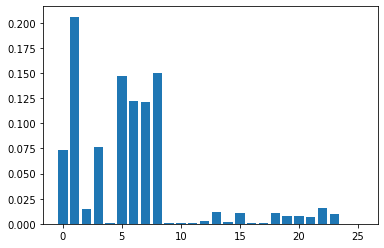

In [87]:
from matplotlib import pyplot as plt
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

## Support Vector Machine

In [88]:
from sklearn.svm import SVC 
# Train and fit the model
svm_model = SVC(kernel='rbf', C=12)
svm_model.fit(X_train, y_train)

# importance = svm_model.feature_importances_
# Model Accuracy
print(f"Training Data Score: {svm_model.score(X_train, y_train)}")
print(f"Testing Data Score: {svm_model.score(X_test, y_test)}")
y_pred_svm=svm_model.predict(test_df)

spaceship_df = pd.DataFrame({'PassengerId':test.PassengerId, 'Transported':y_pred_svm})
spaceship_df['Transported'] = spaceship_df.Transported.map({0:False, 1:True})
# spaceship_df.to_csv('spaceship_svm.csv', index = False)
y_pred_svm

Training Data Score: 0.7299917830731306
Testing Data Score: 0.7216257668711656


array([1, 1, 1, ..., 1, 0, 1], dtype=int64)

In [89]:
from xgboost import XGBClassifier

xg_model = XGBClassifier(booster='gbtree',
                        learning_rate =0.1, n_estimators = 130, max_depth=6,
                        gamma=0.15, subsample = 0.7,colsample_bynode = 0.3,
                        nthread=4,reg_lambda=4,
                        scale_pos_weight = 1.15, seed = 1000, num_parallel_tree=5
                        ).fit(X_train, y_train)

# xg_model=XGBClassifier().fit(X_train_scaled, y_train)

# from sklearn.metrics import mean_absolute_error
print(f'Training Score: {xg_model.score(X_train, y_train)}')
print(f'Testing Score: {xg_model.score(X_test, y_test)}')
y_pred_xgb=xg_model.predict(test_df)
spaceship_df = pd.DataFrame({'PassengerId':test.PassengerId, 'Transported':y_pred_xgb})
spaceship_df['Transported'] = spaceship_df.Transported.map({0:False, 1:True})
spaceship_df.to_csv('spaceship_xgb.csv', index = False)
y_pred_xgb

[23:02:26] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Training Score: 0.8236647493837305
Testing Score: 0.8006134969325154


array([1, 0, 1, ..., 1, 1, 1], dtype=int64)

## CatBoostClassifier

In [90]:
from catboost import CatBoostClassifier

cbc = CatBoostClassifier(iterations=140, learning_rate=0.15)
cbc.fit(X_train, y_train)

# Model Accuracy
print(f'Training Score: {cbc.score(X_train, y_train)}')
print(f'Testing Score: {cbc.score(X_test, y_test)}')
y_pred_cbc  =  cbc.predict(test_df)
print(y_pred_cbc)
spaceship_df = pd.DataFrame({'PassengerId':test.PassengerId, 'Transported':y_pred_cbc})
spaceship_df['Transported'] = spaceship_df.Transported.map({0:False, 1:True})
# save predicted data in csv file
spaceship_df.to_csv('spaceship_cbc.csv', index = False)

0:	learn: 0.6338636	total: 147ms	remaining: 20.4s
1:	learn: 0.6023820	total: 152ms	remaining: 10.5s
2:	learn: 0.5647554	total: 157ms	remaining: 7.16s
3:	learn: 0.5451624	total: 162ms	remaining: 5.49s
4:	learn: 0.5267245	total: 166ms	remaining: 4.49s
5:	learn: 0.5171334	total: 171ms	remaining: 3.82s
6:	learn: 0.5056942	total: 177ms	remaining: 3.35s
7:	learn: 0.4990644	total: 180ms	remaining: 2.98s
8:	learn: 0.4929957	total: 186ms	remaining: 2.7s
9:	learn: 0.4885235	total: 190ms	remaining: 2.47s
10:	learn: 0.4835194	total: 194ms	remaining: 2.27s
11:	learn: 0.4791203	total: 197ms	remaining: 2.11s
12:	learn: 0.4761358	total: 203ms	remaining: 1.98s
13:	learn: 0.4714925	total: 207ms	remaining: 1.86s
14:	learn: 0.4682841	total: 211ms	remaining: 1.76s
15:	learn: 0.4667302	total: 217ms	remaining: 1.68s
16:	learn: 0.4645886	total: 221ms	remaining: 1.6s
17:	learn: 0.4619054	total: 225ms	remaining: 1.52s
18:	learn: 0.4594485	total: 230ms	remaining: 1.46s
19:	learn: 0.4568548	total: 234ms	remaining

## Ada Boost Classifier

In [91]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

# Train and fit the model
# abc = AdaBoostClassifier(random_state=19, n_estimators=76, 
#                          base_estimator=DecisionTreeClassifier(
#                              max_depth=2,max_features = 'auto'))

abc = AdaBoostClassifier(random_state=70, n_estimators=130, learning_rate=0.1,
                         base_estimator=DecisionTreeClassifier(criterion='gini',
                             max_depth=3,max_features = 'auto', min_samples_leaf=6))
abc.fit(X_train, y_train)

# Model accuracy
print(f'Training Score: {abc.score(X_train, y_train)}')
print(f'Testing Score: {abc.score(X_test, y_test)}')
y_pred_ada  =  abc.predict(test_df)
print(y_pred_ada)
spaceship_df = pd.DataFrame({'PassengerId':test.PassengerId, 'Transported':y_pred_ada})
spaceship_df['Transported'] = spaceship_df.Transported.map({0:False, 1:True})
# save predicted data in csv file
spaceship_df.to_csv('spaceship_ada.csv', index = False)

Training Score: 0.7990139687756779
Testing Score: 0.7983128834355828
[1 0 1 ... 1 1 1]


## KNearest Neighbor Classification

k: 1, Train/Test Score: 0.940/0.715
k: 3, Train/Test Score: 0.841/0.749
k: 5, Train/Test Score: 0.819/0.757
k: 7, Train/Test Score: 0.809/0.772
k: 9, Train/Test Score: 0.808/0.767
k: 11, Train/Test Score: 0.801/0.765
k: 13, Train/Test Score: 0.802/0.763
k: 15, Train/Test Score: 0.798/0.770
k: 17, Train/Test Score: 0.796/0.766
k: 19, Train/Test Score: 0.791/0.776


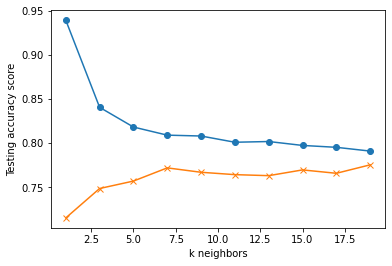

In [92]:
from sklearn.neighbors import KNeighborsClassifier
train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k,weights='uniform', metric='minkowski')
    knn.fit(X_train_rs, y_train)
    train_score = knn.score(X_train_rs, y_train)
    test_score = knn.score(X_test_rs, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 20, 2), train_scores, marker='o')
plt.plot(range(1, 20, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy score")
plt.show()

## Robest Scaler in KNN

In [93]:

knn = KNeighborsClassifier(n_neighbors=29, metric='minkowski', leaf_size=25, p=2, algorithm='auto')
knn.fit(X_train_rs, y_train)

print(f'Training Score: {knn.score(X_train_rs, y_train)}')
print(f'Testing Score: {knn.score(X_test_rs, y_test)}')
y_pred_knn = knn.predict(test_df)
print(y_pred_knn)
# Numpy array to datafram
spaceship_df = pd.DataFrame({'PassengerId':test.PassengerId, 'Transported':y_pred_knn})

# Change values to True, False
spaceship_df['Transported'] = spaceship_df.Transported.map({0:False, 1:True})
spaceship_df.to_csv('spaceship_knn.csv', index = False)

Training Score: 0.790304026294166
Testing Score: 0.785659509202454
[1 0 1 ... 1 1 1]


In [94]:
# Automated Neural Network Model
import tensorflow as tf

# Create a method that creates a new Sequential model with hyperparameter options
def create_model(hp):
    nn_model = tf.keras.models.Sequential()

    # Allow kerastuner to decide which activation function to use in hidden layers
    activation = hp.Choice('activation', ['relu','tanh', 'sigmoid'])
    
    # Allow kerastuner to decide number of neurons in first layer
    nn_model.add(tf.keras.layers.Dense(units=hp.Int('first_units',
        min_value=1,
        max_value=30,
        step=5), activation=activation, input_dim=28))

    # Allow kerastuner to decide number of hidden layers and neurons in hidden layers
    for i in range(hp.Int('num_layers', 1, 5)):
        nn_model.add(tf.keras.layers.Dense(units=hp.Int('units_' + str(i),
            min_value=1,
            max_value=30,
            step=5),
            activation=activation))
    
    # Output layer
    nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

    # Compile the model
    nn_model.compile(loss="binary_crossentropy", optimizer='adam', metrics=["accuracy"])
    
    return nn_model


In [ ]:
# Import the kerastuner library
import keras_tuner as kt

tuner = kt.Hyperband(
    create_model,
    objective="val_accuracy",
    factor = 4,
    max_epochs=20,
    hyperband_iterations=6)

In [ ]:
# # Run the kerastuner search for best hyperparameters
tuner.search(X_train_scaled,y_train,epochs=20,validation_data=(X_test_scaled,y_test))

In [ ]:
tuner.results_summary()

In [ ]:
from tensorflow.keras.optimizers import Adam
import tensorflow as tf

tf.random.set_seed(60)
# Create sequential model
model = tf.keras.models.Sequential()

# Create first layer of input
model.add(tf.keras.layers.Dense(units = 26, activation = 'tanh', input_dim=30))

# model.add(tf.keras.layers.Dense(units = 21, activation = 'tanh'))

# Create hidden layers 
model.add(tf.keras.layers.Dense(units = 21, activation = 'tanh'))

model.add(tf.keras.layers.Dense(units = 1, activation = 'tanh'))

model.add(tf.keras.layers.Dense(units = 11, activation = 'tanh'))

# Create ouput layers
model.add(tf.keras.layers.Dense(units = 1, activation = 'sigmoid'))

# Structure of sequential model
model.summary()

In [ ]:
# Compile the model
# lr = tf.keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, name='Adam')
model.compile(loss = "binary_crossentropy", optimizer = "adam", metrics = ['accuracy'])

# Fit the model
fit_model = model.fit(X_train_scaled, y_train, epochs = 15, validation_split=0.03) 

In [ ]:
# Evaluate the model using the test data
model_loss, model_accuracy = model.evaluate(X_train_scaled,y_train,verbose=2)
print(f"Train Loss: {model_loss}, Train Accuracy: {model_accuracy}")
model_loss, model_accuracy = model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Test Loss: {model_loss}, Test Accuracy: {model_accuracy}")

In [ ]:

y_pred_nn = model.predict(test_df_scaled, verbose=2)
y_pred_n=np.where(y_pred_nn >= 0.5, 1,0).flatten()
print(y_pred_n)
# Numpy array to dataframe
spaceship_df = pd.DataFrame({'PassengerId':test.PassengerId, 'Transported':y_pred_n})

# Change values to True, False
spaceship_df['Transported'] = spaceship_df.Transported.map({0:False, 1:True})
spaceship_df.to_csv('spaceship_nn.csv', index = False)

In [ ]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history, index=range(1,len(fit_model.history["loss"])+1))

# Plot the accuracy
history_df.plot(y="accuracy")